### Uber Trips Analysis

Drawing inference and analysing data of uber trips, The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("uber.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [2]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


In [ ]:
# checking to see the day trips was the highest

sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

C:\Users\x\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

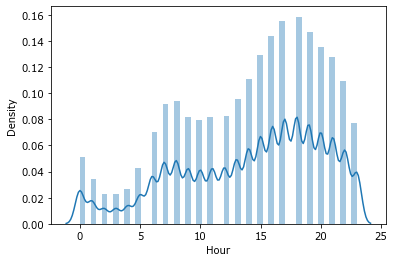

In [3]:
# we can also check our plot hourly

sns.distplot(data["Hour"])

We can thus conclude that uber trips decrease at midnight and then start rising at 5am in the morning according to our plot.


C:\Users\x\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

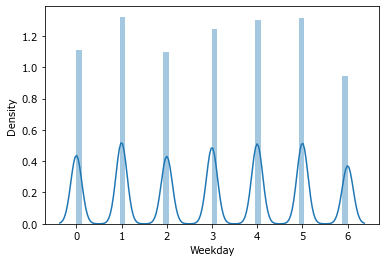

In [4]:
# plotting according to weekdays to check weekday with highest and lowest trips

sns.distplot(data["Weekday"])

0 indicates first day of the week which is sunday, increasing till the other days of the week.

We hence find a correlation between them


<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

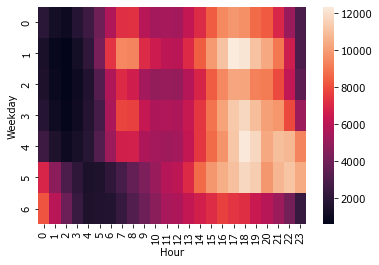

In [5]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

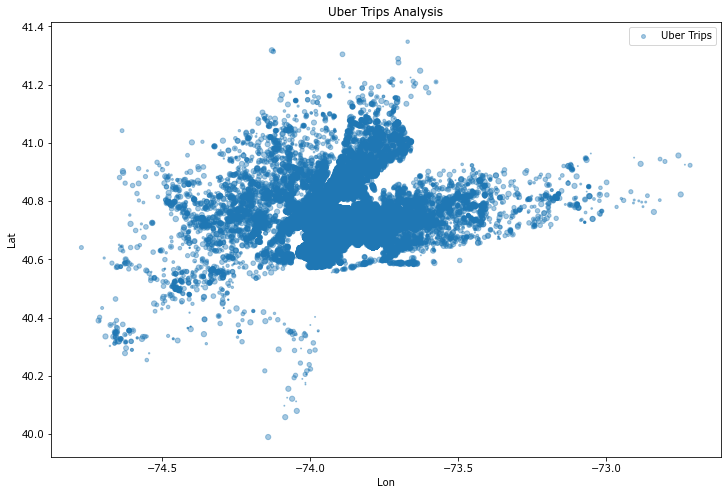

In [6]:
#plotting the data according to  region in the cities

data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

### Conclusion

I hereby conclude from my analysis of the dataset that:

1. Monday is the most profitable day for Uber
2. On Saturdays less number of people use Uber
3. 6 pm is the busiest day for Uber
4. On average a rise in Uber trips start around 5 am.